In [5]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig = [x.split("/")[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc)+1

print(targets_enc)
print(len(lbl_enc.classes_))

train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs, 
    targets=train_targets,
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH)
    )
train_dataloder = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.BATCH_SIZE,
    num_workers=config.NUM_WORKERS,
    shuffle=True,
    )

[[14  1  2  8 16]
 [14  6  4  8 12]
 [12 15  8 12 17]
 ...
 [15 18 18 12  7]
 [18  5  8  4 14]
 [ 8  1 15 11 15]]
19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


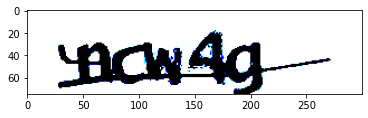

In [10]:
npimg = train_dataset[715]["images"].numpy()
plt.imshow(np.transpose(npimg, (1,2, 0)) * 255)